In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# coil dimentions and winding parameters
coil_width = 0.086  # width of the square cross area; mm
coil_height = 0.022  # vertical length for winding; mm
coil_depth = 0.025  # winding per layer
# other inputs

Bmax = 0.001
cham_d = 0.5  #diameter of the chamber 
cwidth = 0.086
cheight = 0.022
clength = 0.025
mu0 = 1.26e-6
rho = 0.02e-9
inst = 0.0001    #distance between wires in each layer; either air or copper insulating cover 

In [104]:
def lay(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    return n_layer


def Imax(d):
    return Bmax * clength / (mu0 * wind(d))

def wind_l(d):
    return cheight / d


def wind(d):
    return clength/d * lay(d)


def eff_length(d):
    n_layer = int((cheight/d - 1) * sin(60 / 180 * pi) + 1)
    for n in range (n_layer):
        eff_length = wind(d) * (cwidth + 2*d)
    return eff_length



def R(d):
    A = (d/2)**2 * np.pi

    return rho * eff_length(d)/A


def P(d):
    return Imax(d)**2 * R(d)


def I(d):
    print('layer:', lay(d))
    print('windings:', wind(d))
    print('eff_length:', eff_length(d))
    print('Imax:', Imax(d))
    print('Power:', P(d))
    print ('wind_layer:', wind_l(d))



In [105]:
I(0.0005)

layer: 38
windings: 1900.0
eff_length: 165.29999999999998
Imax: 0.010442773600668339
Power: 1.836135318321584e-06
wind_layer: 44.0


In [5]:
for n in range (wind_l(d)):
    dist = cham/2 + (n-1) * (d + inst)
    
    
    

NameError: name 'd' is not defined

In [ ]:
d = 0.001
l = 0.086 #m
wire = np.pi*wind(d)*l
wire

In [6]:
density = 8.960 #kg/m3
volume = np.pi* (d/2)**2* wire
mass = volume*density 
mass

NameError: name 'd' is not defined

In [146]:
# Q = watt*t
# Q = c*m*delta_T

#def heat(P, t, m, c):
 #   return P * t / (m*c)

def heat(P, t):
    return P*t
#input

t = 4* 3600 #min
m  = 0.0009031082811172807  #kg
c = 384.4  #J/kg/K

In [147]:
#calculate power for a specific dimention (0.0001)
power = P(0.001)

#heat  = heat(power, t, m, c)
heat = heat(power, t)
delta_T = heat / (c*m)  #assuming heat loss to surronding goes into raising the T

print("Heat generated:", heat, "J")
print("T change:", delta_T, "K")

Heat generated: 0.1312900067610909 J
T change: 0.37818862929120567 K


In [24]:
def B_field(x,y,d):
    z= np.sqrt(3) * (x + 0.5 *y)
    return Bmax *np.exp(-2*np.pi*(x**2 + y**2) /(d**2)) * np.cos(z / (d/2))


In [8]:
 B_h_t(-0.3, 0.001, 0.0, 0.0, 0)

-9.326519963554433e-06

In [10]:
 B_h_b(-0.3, 0.001, 0.0, 0.0, 0.0)

-9.326519963554433e-06

In [12]:
B_v_l(-0.3, 0.001, 0.0, 0.0, 0)

-1.8653039927108866e-05

In [69]:
def B_h_t(Imax, d, x, y, z):
    a_ht = np.sqrt((x - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1ht = (cwidth/2 + y)/sqrt((cwidth/2 + y)**2 + a_ht**2 )
    cos2ht = (cwidth/2 - y)/sqrt((cwidth/2 - y)**2 + a_ht**2 )
    B0_t = lay(d)*4* np.pi*mu0*Imax*(cos2ht + cos1ht)/(4*np.pi*a_ht)
    B_hz = B0_t *(cham_d/2+z)/a_ht
    B_hx = -B0_t *(cwidth/2- x)/a_ht   
  #  B_ht = B0_t *(B_hz + B_hx)
    return B_hz


def B_h_b(Imax, d, x, y, z):
    a_hb = np.sqrt((x - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1hb = (cwidth/2 + y)/sqrt((cwidth/2 + y)**2 + a_hb**2 )
    cos2hb = (cwidth/2 - y)/sqrt((cwidth/2 - y)**2 + a_hb**2 )
    B0_b = lay(d)*4* np.pi*mu0*Imax*(cos1hb + cos2hb)/(4*np.pi*a_hb)
    B_hzb = B0_b * (cham_d/2+z)/a_hb
    B_hxb = B0_b * (cwidth/2- x)/a_hb  
   # B_hb = B0 *(B_hzb + B_hxb)
    return  B_hzb


def B_v_l(Imax, d, x, y, z):
    a_vl = np.sqrt((y - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1vl = (cwidth + x)/sqrt((cwidth/2 + x)**2 + a_vl**2 )
    cos2vl = (cwidth - x)/sqrt((cwidth/2 - x)**2 + a_vl**2 )
    B0_v = lay(d)*4* np.pi*mu0*Imax*(cos1vl + cos2vl)/(4*np.pi*a_vl)
    B_vzl = B0_v * (cham_d/2+z)/a_vl
    B_vyl = B0_v *(cwidth/2- y)/a_vl  
 #   B_vl = B0_v *(B_vzl + B_vyl)
    return B_vzl

def B_v_r(Imax, d, x, y, z):
    a_vr = np.sqrt((y - cwidth/2)**2 + (z + cham_d/2)**2)
    cos1vr = (cwidth/2 + x)/sqrt((cwidth/2 + x)**2 + a_vr**2 )
    cos2vr = (cwidth/2 - x)/sqrt((cwidth/2 - x)**2 + a_vr**2 )
    B0_vr = -lay(d)*4* np.pi*mu0*Imax*(cos1vr + cos2vr)/(4*np.pi*a_vr)
    B_vzr = B0_vr*(cham_d/2+z)/a_vr
    B_vyr = -B0_vr*(cwidth/2- y)/a_vr
 #   B_vr = B0_vr*(B_vzr + B_vyr)
    return   B_vzr

In [70]:
def B_h2_t(Imax, d, x, y, z):
    a_ht = np.sqrt((x - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1ht = (cwidth/2 + y)/sqrt((cwidth/2 + y)**2 + a_ht**2 )
    cos2ht = (cwidth/2 - y)/sqrt((cwidth/2 - y)**2 + a_ht**2 )
    B0_t = lay(d)*4* np.pi*mu0*Imax*(cos2ht + cos1ht)/(4*np.pi*a_ht)
    B_hz = B0_t *(cham_d/2-z)/a_ht
    B_hx = -B0_t *(cwidth/2- x)/a_ht   
  #  B_ht = B0_t *(B_hz + B_hx)
    return B_hz



def B_h2_b(Imax, d, x, y, z):
    a_hb = np.sqrt((x - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1hb = (cwidth/2 + y)/sqrt((cwidth/2 + y)**2 + a_hb**2 )
    cos2hb = (cwidth/2 - y)/sqrt((cwidth/2 - y)**2 + a_hb**2 )
    B0_b = lay(d)*4* np.pi*mu0*Imax*(cos1hb + cos2hb)/(4*np.pi*a_hb)
    B_hzb = B0_b * (cham_d/2-z)/a_hb
    B_hxb = B0_b * (cwidth/2- x)/a_hb  
   # B_hb = B0 *(B_hzb + B_hxb)
    return  B_hzb



def B_v2_r(Imax, d, x, y, z):
    a_vr = np.sqrt((y - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1vr = (cwidth/2 + x)/sqrt((cwidth/2 + x)**2 + a_vr**2 )
    cos2vr = (cwidth/2 - x)/sqrt((cwidth/2 - x)**2 + a_vr**2 )
    B0_vr = -lay(d)*4* np.pi*mu0*Imax*(cos1vr + cos2vr)/(4*np.pi*a_vr)
    B_vzr = B0_vr*(cham_d/2-z)/a_vr
    B_vyr = -B0_vr*(cwidth/2- y)/a_vr
 #   B_vr = B0_vr*(B_vzr + B_vyr)
    return   B_vzr


def B_v2_l(Imax, d, x, y, z):
    a_vl = np.sqrt((y - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1vl = (cwidth + x)/sqrt((cwidth/2 + x)**2 + a_vl**2 )
    cos2vl = (cwidth - x)/sqrt((cwidth/2 - x)**2 + a_vl**2 )
    B0_v = lay(d)*4* np.pi*mu0*Imax*(cos1vl + cos2vl)/(4*np.pi*a_vl)
    B_vzl = B0_v * (cham_d/2-z)/a_vl
    B_vyl = B0_v *(cwidth/2- y)/a_vl  
 #   B_vl = B0_v *(B_vzl + B_vyl)
    return B_vzl



In [27]:
B_v2_r(-0.3, 0.001, 0.0, 0.0, 0)

9.326519963554433e-06

In [77]:
def B_total(Imax, d, x, y, z):
    B_1 = B_v_l(Imax, d, x, y, z) + B_v_r(Imax, d, x, y, z) + B_h_t(Imax, d, x, y, z) + \
            B_h_b(Imax, d, x, y, z) + B_v2_l(Imax, d, x, y, z) + B_v2_r(Imax, d, x, y, z) + \
            B_h2_t(Imax, d, x, y, z) + B_h2_b(Imax, d, x, y, z)
    print('Magnetic field:', B_1)
    
def Imax(Bmax, d, x, y, z):
    

In [79]:
B_total(0.3, 0.001, 0.0, 0.0, 0.21)

Magnetic field: 0.0003038466444339947


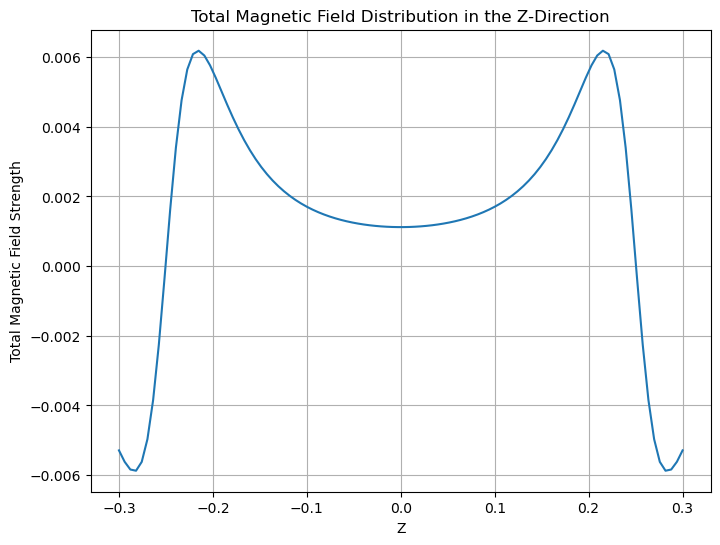

In [98]:
z_vals = np.linspace(-0.3, 0.3, 100)
Z = np.zeros_like(z_vals)  # Assume z = 0 for the plane

# Calculate the total magnetic field in the z-direction
B_total_z = np.zeros_like(z_vals)
for z_index, z_val in enumerate(z_vals):
#    B_v_l(Imax, d, x, y, z) + B_v_r(Imax, d, x, y, z) + B_h_t(Imax, d, x, y, z) + B_h_b(Imax, d, x, y, z)
    B_total_z[z_index] = B_v_l(3, 0.0005, 0.0, 0.0, z_val) + B_v_r(3, 0.0005, 0.0, 0.0, z_val) + \
                          B_h_t(3, 0.0005, 0.0, 0.0, z_val) + B_h_b(3, 0.0005, 0.0, 0.0, z_val) + \
                            B_v2_l(3, 0.0005, 0.0, 0.0, z_val) + B_v2_r(3, 0.0005, 0.0, 0.0, z_val) + \
                            B_h2_t(3, 0.0005, 0.0, 0.0, z_val) + B_h2_b(3, 0.0005, 0.0, 0.0, z_val)



# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(z_vals, B_total_z)
plt.xlabel('Z')
plt.ylabel('Total Magnetic Field Strength')
plt.title('Total Magnetic Field Distribution in the Z-Direction')
plt.grid(True)
plt.show()

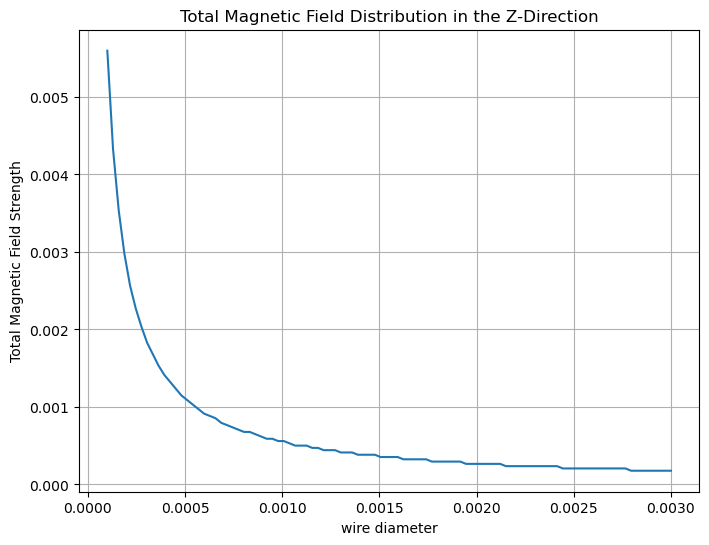

In [99]:
d_vals = np.linspace(0.0001, 0.003, 100)
D = np.zeros_like(d_vals)  

# Calculate the total magnetic field as a function of d for a given Imax
B_total_d = np.zeros_like(d_vals)
for d_index, d_val in enumerate(d_vals):

    B_total_d[d_index] = B_v_l(3, d_val, 0.0, 0.0, 0) + B_v_r(3, d_val, 0.0, 0.0, 0) + \
                          B_h_t(3, d_val, 0.0, 0.0, 0) + B_h_b(3, d_val, 0.0, 0.0, 0) + \
                            B_v2_l(3, d_val, 0.0, 0.0, 0) + B_v2_r(3, d_val, 0.0, 0.0, 0) + \
                            B_h2_t(3, d_val, 0.0, 0.0, 0) + B_h2_b(3, d_val, 0.0, 0.0, 0)



# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(d_vals, B_total_d)
plt.xlabel('wire diameter')
plt.ylabel('Total Magnetic Field Strength')
plt.title('Total Magnetic Field Distribution in the Z-Direction')
plt.grid(True)
plt.show()

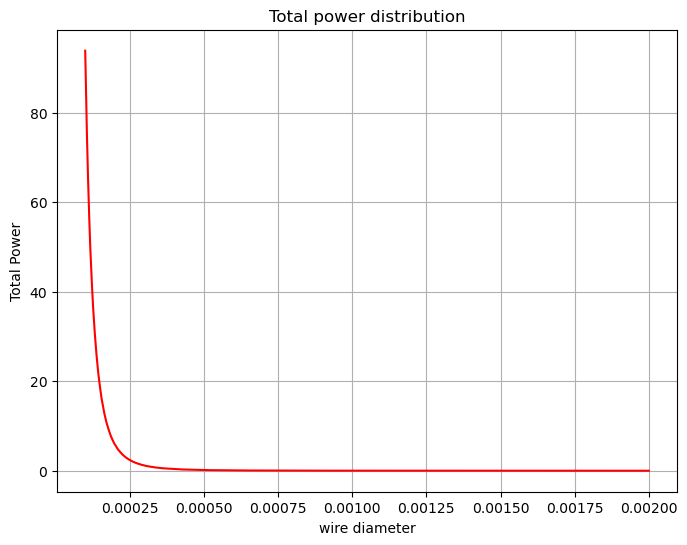

In [120]:
def P_test(d):
    Power = Imax **2 * R(d)
    return Power


Imax = 3 #A
d_vals = np.linspace(0.0001, 0.002, 1000)
D = np.zeros_like(d_vals)  

power = np.zeros_like(d_vals)
for d_index, d_val in enumerate(d_vals):

    power[d_index] = P_test(d_val)

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(d_vals, power,color = 'red')
plt.xlabel('wire diameter')
plt.ylabel('Total Power')
plt.title('Total power distribution')
plt.grid(True)
plt.show()


In [101]:
#input

t = 60 #min
m  = 0.0009031082811172807  #kg
c = 384.4  #J/kg/K
density = 8.960 #kg/m3
volume = np.pi* (d/2)**2* wire
mass = volume*density 
mass


def heat(P, t):
    return P*t

#calculate power for a specific dimention (0.0001)
power = P(0.0005)

#heat  = heat(power, t, m, c)
heat = heat(power, t)
delta_T = heat / (c*m)  #assuming heat loss to surronding goes into raising the T

print("Heat generated:", heat, "J")
print("T change:", delta_T, "K")


NameError: name 'd' is not defined

In [123]:
# Generate data
y_vals = np.linspace(-0.04, 0.04, 100)
z_vals = np.linspace(-0.0, 0.34, 100)
Y, Z = np.meshgrid(y_vals, z_vals)


# Calculate the total magnetic field at each point in the y-z plane 
B_total_yz = np.zeros_like(Y)
for i in range(len(y_vals)):
    for j in range(len(z_vals)):
        B_total_yz[d_index] = B_v_l(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + B_v_r(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + \
                          B_h_t(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + B_h_b(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + \
                            B_v2_l(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + B_v2_r(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + \
                            B_h2_t(3, 0.0005, 0.0, Y[i, j], Z[i, j]) + B_h2_b(3, 0.0005, 0.0, Y[i, j], Z[i, j])




# Plot the result
plt.figure(figsize=(8, 6))
plt.contourf(Z, Y, B_total_yz, cmap='viridis')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Total Magnetic Field Distribution in the Y-Z Plane')
plt.grid(True)
plt.show()

IndexError: index 999 is out of bounds for axis 0 with size 100

In [96]:
Imax(0.001, 0.0005, 0, 0, 0)

-146.8801356676251

In [307]:
def B_t(Imax, d, x, y, z):
    B_total = B_v(Imax, d, x, y, z) + B_h(Imax, d, x, y, z)
    return B_total

In [94]:
def Imax (Bmax, d, x, y, z):
    a_h = np.sqrt((x - cwidth/2)**2 + (z - cham_d/2)**2)
    a_v = np.sqrt((y - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1h = (cwidth/2 + y)/sqrt((cwidth/2 + y)**2 + a_h**2 )
    cos2h = (cwidth/2 - y)/sqrt((cwidth/2 - y)**2 + a_h**2 )
    cos1v = (cwidth/2 + x)/sqrt((cwidth/2 + x)**2 + a_v**2 )
    cos2v = (cwidth/2 - x)/sqrt((cwidth/2 - x)**2 + a_v**2 )
    B_vz = (y - cwidth/2)/a_v
    B_hz = (x- cwidth/2)/a_h
    C1 = (cos1h + cos2h)/a_h
    C2 = (cos1v + cos2v)/a_v
    Imax = (Bmax * 4 * np.pi) /(4*lay(d)* mu0* (C1* B_hz + C2 * B_vz))
    
    return Imax
    

In [308]:
B_t(-0.3,0.001, 0.04, 0.04, 0.04)

7.59037456036959e-07

In [309]:
B2 = B_v(-0.3,0.001, 0.04, 0.04, 0.04)

In [311]:
B_total_l(0.003, 0.001, 0.04, 0.04, 0.04)

5.367205323383196e-07

Magnetic field: -9.980599427728809e-05
Magnetic field: -0.00010010190809480826
Magnetic field: -0.00010039624298944458
Magnetic field: -0.00010068896459439799
Magnetic field: -0.00010098003852209992
Magnetic field: -0.00010126943037248625
Magnetic field: -0.00010155710574135567
Magnetic field: -0.00010184303022880962
Magnetic field: -0.00010212716944777038
Magnetic field: -0.00010240948903257407
Magnetic field: -0.00010268995464763551
Magnetic field: -0.00010296853199618129
Magnetic field: -0.00010324518682904753
Magnetic field: -0.00010351988495353867
Magnetic field: -0.00010379259224234448
Magnetic field: -0.00010406327464251019
Magnetic field: -0.00010433189818445719
Magnetic field: -0.00010459842899104981
Magnetic field: -0.00010486283328670467
Magnetic field: -0.00010512507740653815
Magnetic field: -0.00010538512780554842
Magnetic field: -0.00010564295106782804
Magnetic field: -0.00010589851391580208
Magnetic field: -0.00010615178321948888
Magnetic field: -0.00010640272600577862
M

C:\Users\jparvizinejad\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\jparvizinejad\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


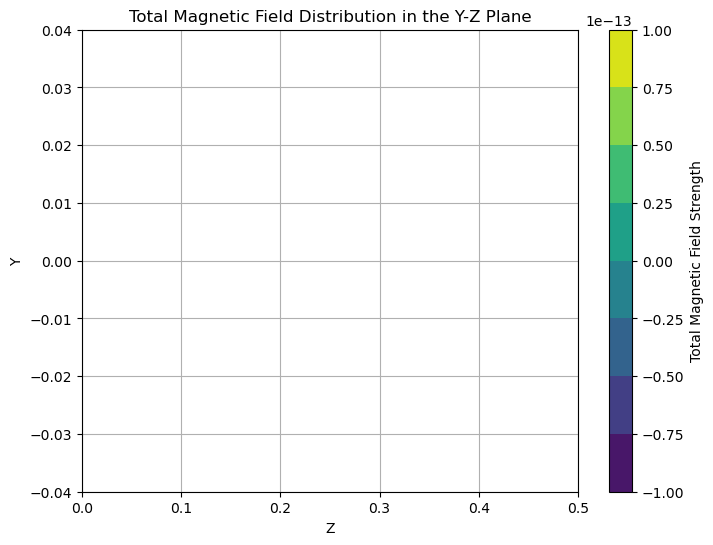

In [18]:
# Generate data
y_vals = np.linspace(-0.04, 0.04, 100)
z_vals = np.linspace(0, 0.5, 100)
Y, Z = np.meshgrid(y_vals, z_vals)

# Calculate the total magnetic field at each point in the y-z plane
B_t_yz = np.zeros_like(Y)
for i in range(len(y_vals)):
    for j in range(len(z_vals)):
        B_t_yz[i, j] =(B_total(-0.3, 0.0005, 0.0, Y[i, j], Z[i, j])) 
  #      B_t_yz[i, j] = np.sqrt(B_h(0.003,0.001, 0.04, Y[i, j], Z[i, j])**2 + B_v(0.003, 0.001, 0.04, Y[i, j], Z[i, j])**2)

# Plot the result
plt.figure(figsize=(8, 6))
plt.contourf(Z, Y, B_t_yz, cmap='viridis')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Total Magnetic Field Distribution in the Y-Z Plane')
plt.grid(True)
plt.show()

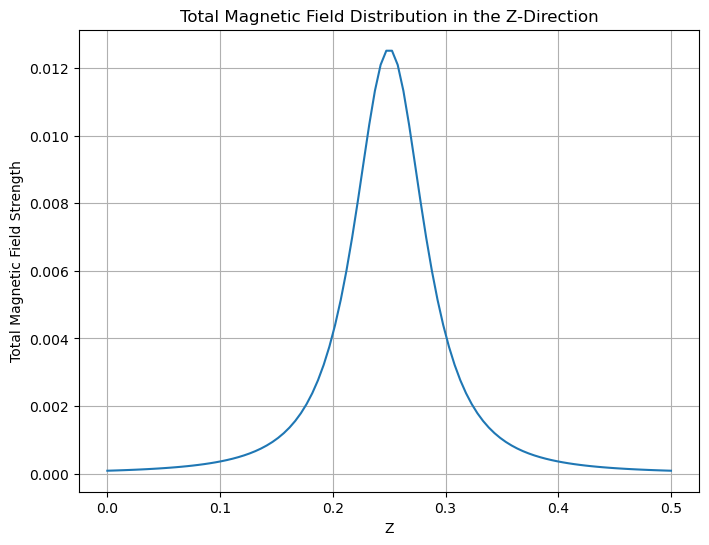

In [370]:
z_vals = np.linspace(0, 0.5, 100)
Z = np.zeros_like(z_vals)  # Assume z = 0 for the plane

# Calculate the total magnetic field in the z-direction
B_total_z = np.zeros_like(z_vals)
for z_index, z_val in enumerate(z_vals):
    B_h_vals = B_h(-0.997514444135389, 0.0005, 0.0, 0.0, z_val)
    B_v_vals = B_v(-0.997514444135389, 0.0005, 0.0, 0.0, z_val)
    B_total_z[z_index] = 2* (B_h_vals + B_v_vals)
  #  B_total_z[z_index] = np.sqrt(B_h_vals**2 + B_v_vals**2)

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(z_vals, B_total_z)
plt.xlabel('Z')
plt.ylabel('Total Magnetic Field Strength')
plt.title('Total Magnetic Field Distribution in the Z-Direction')
plt.grid(True)
plt.show()

In [367]:
def Imax (Bmax, d, x, y, z):
    a_h = np.sqrt((x - cwidth/2)**2 + (z - cham_d/2)**2)
    a_v = np.sqrt((y - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1h = (cwidth + y)/sqrt((cwidth/2 + y)**2 + a_h**2 )
    cos2h = (cwidth - y)/sqrt((cwidth/2 - y)**2 + a_h**2 )
    cos1v = (cwidth + x)/sqrt((cwidth/2 + x)**2 + a_v**2 )
    cos2v = (cwidth - x)/sqrt((cwidth/2 - x)**2 + a_v**2 )
    B_vz = (y - cwidth/2)/a_v
    B_hz = (x- cwidth/2)/a_h
    C1 = (cos1h + cos2h)/a_h
    C2 = (cos1v + cos2v)/a_v
    Imax = (Bmax * 4 * np.pi) /(2*lay(d)* mu0* (C1* B_hz + C2 * B_vz))
    
    return Imax
    

In [369]:
Imax(0.001, 0.001, 0, 0, 0.25)

-1.995028888270778

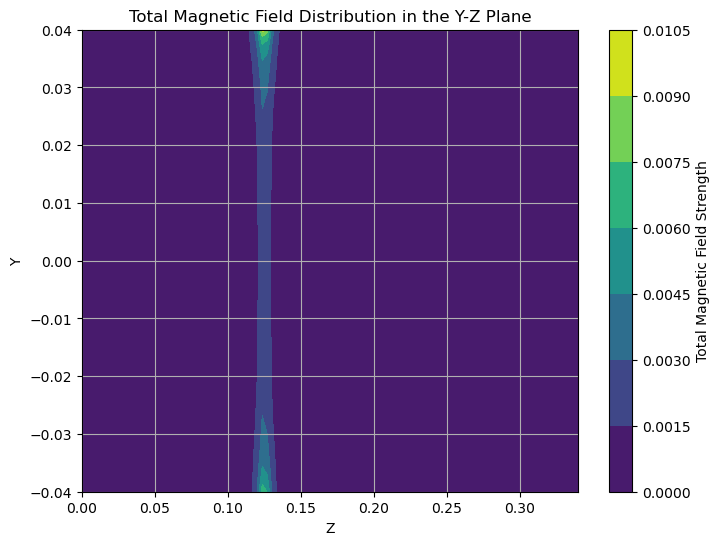

In [167]:
# Generate data
y_vals = np.linspace(-0.04, 0.04, 100)
z_vals = np.linspace(-0.0, 0.34, 100)
Y, Z = np.meshgrid(y_vals, z_vals)

# Calculate the total magnetic field at each point in the y-z plane
B_total_yz = np.zeros_like(Y)
for i in range(len(y_vals)):
    for j in range(len(z_vals)):
        B_total_yz[i, j] = np.sqrt(B_h(0.001, 0.04, Y[i, j], Z[i, j])**2 + B_v(0.001, 0.04, Y[i, j], Z[i, j])**2)

# Plot the result
plt.figure(figsize=(8, 6))
plt.contourf(Z, Y, B_total_yz, cmap='viridis')
plt.colorbar(label='Total Magnetic Field Strength')
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Total Magnetic Field Distribution in the Y-Z Plane')
plt.grid(True)
plt.show()

In [170]:
import numpy as np

# Constants
mu0 = 4 * np.pi * 10**-7  # Permeability of free space (in T*m/A)

def calculate_current(B_max, z, x, y):
    r = np.sqrt(x**2 + y**2)
    I = (2 * np.pi * r * B_max) / mu0
    return I

# Example usage
B_max = 0.001  # Maximum magnetic field strength desired (in Tesla)
z = 0.30  # Desired z-coordinate (in meters)
x = 0.080  # x-coordinate of the wire (in meters)
y = 0.080  # y-coordinate of the wire (in meters)

required_current = calculate_current(B_max, z, x, y)
print("Required current to achieve B_max at z =", z, "is:", required_current, "Amperes")


Required current to achieve B_max at z = 0.3 is: 565.685424949238 Amperes


In [172]:
import numpy as np

# Constants
mu0 = 4 * np.pi * 10**-7  # Permeability of free space (in T*m/A)

def calculate_current(B_max, z, d, N):
    r_wire = d / 2  # Radius of the wire
    A_wire = np.pi * r_wire**2  # Cross-sectional area of the wire
    I_single = (2 * np.pi * r_wire * B_max) / mu0  # Current for a single layer
    total_current = I_single * N  # Total current for all layers
    return total_current

# Example usage
B_max = 0.001  # Maximum magnetic field strength desired (in Tesla)
z = 0.20  # Desired z-coordinate (in meters)
d = 0.001  # Diameter of the wire (in meters)
N = 10  # Number of layers

required_current = calculate_current(B_max, z, d, N)
print("Required current to achieve B_max at z =", z, "with wire diameter", d, "and", N, "layers is:", required_current, "Amperes")


Required current to achieve B_max at z = 0.2 with wire diameter 0.001 and 10 layers is: 25.0 Amperes


In [140]:
import numpy as np

# Define the functions B_h and B_v
def B_h(d, x, y, z):
    a_h = np.sqrt((x - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1h = (cwidth + y)/np.sqrt((cwidth/2 + y)**2 + a_h**2)
    cos2h = (cwidth - y)/np.sqrt((cwidth/2 - y)**2 + a_h**2)
    return lay(d)*mu0*(cos1h + cos2h)/(4*np.pi*a_h)

def B_v(d, x, y, z):
    a_v = np.sqrt((y - cwidth/2)**2 + (z - cham_d/2)**2)
    cos1v = (cwidth + x)/np.sqrt((cwidth/2 + x)**2 + a_v**2)
    cos2v = (cwidth - x)/np.sqrt((cwidth/2 - x)**2 + a_v**2)
    return lay(d)*mu0*(cos1v + cos2v)/(4*np.pi*a_v)



# Define the function to calculate the total magnetic field
def B_total(d, x, y, z):
    B_h_val = B_h(d, x, y, z)
    B_v_val = B_v(d, x, y, z)
    return np.sqrt(B_h_val**2 + B_v_val**2)

# Calculate the total magnetic field at a specific point
total_magnetic_field = B_total(0.001, 0.04, 0.04, 0.04)
print("Total magnetic field:", total_magnetic_field)


Total magnetic field: 5.0706508708086233e-05


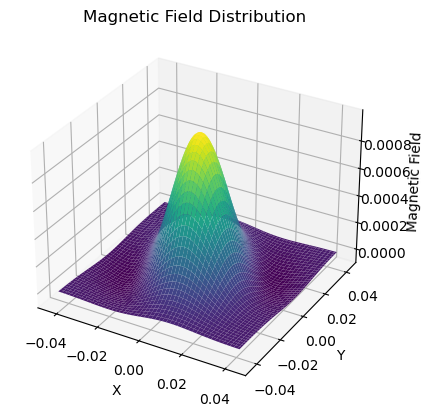

In [49]:
#create a mesh grid

x = np.linspace(-0.043, 0.043, 100)
y = np.linspace(-0.043, 0.043, 100)
X, Y = np.meshgrid(x,y)
Z = B_field(X, Y, -0.060)


#plot the magnetic field distribution 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Magnetic Field')
ax.set_title('Magnetic Field Distribution')

plt.show()

In [105]:
def plot_heat_variation():
    dimensions = np.linspace(0.001, 0.0001, 100)  # range of coil dimesion to nalysis
    heat = [P(d) for d in dimensions]
    plt.plot(dimensions, heat)
    plt.xlabel('Coil Dimension (m)')
    plt.ylabel('Heat (W)')
    plt.title('Heat Variation with Coil Dimension')


def analyze_heat(d):
    print('layer:', lay(d))
    print('winding:', wind(d))
    print('Imax:', Imax(d))
    print('Power:', P(d))

layer: 19
winding: 475.0
Imax: 0.041771094402673355
Power: 9.117361580631312e-06


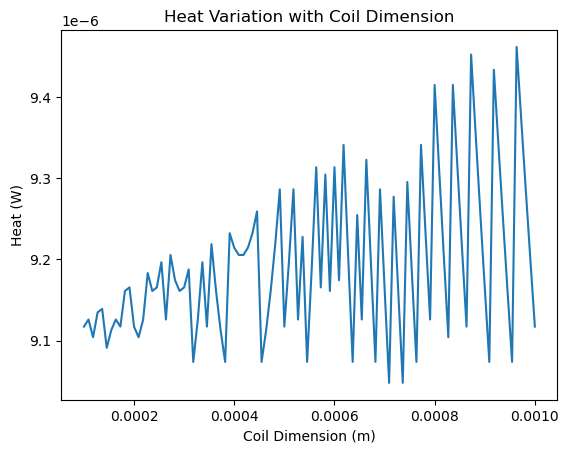

In [106]:
# Plotting heat variation with coil dimenstion

plot_heat_variation()

# Analysing heat for a specific dimension (0.001 m)

analyze_heat(0.001)